<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/pca/ML_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Algoritmo PCA: Análise de Componentes Principais**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#1 PCA - Principal Componente Analysis

In [4]:
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#2 Redução de Dimensionalidade

As ações dessa seção estão sendo implementadas seguindo a lógica do script `main.py` disponível no repositório fornecido pelo Prof. Eduardo Bezerra para disciplina Aprendizado de Máquina*, contudo executadas de maneira separada nas células do notebook para melhor acompanhamento de cada etapa do processo de *redução de dimensionalidade*.

*https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t2/pca

##2.1 Conjunto de dados de exemplo

In [5]:
#Carga do conjunto de dados
arquivo = 'https://raw.githubusercontent.com/janiosl/python.ds/master/data/ex7data1_mat_to_csv.csv'
X = pd.read_csv(arquivo)
X = np.array([X.x1, X.x2]).T

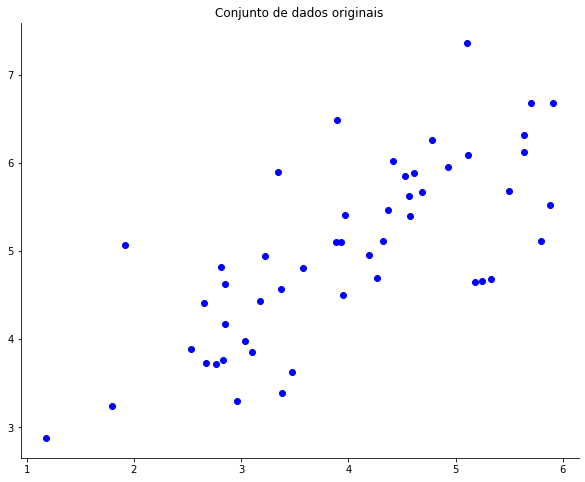

In [6]:
#Plotagem dos dados originais
plt.figure(figsize=(10,8))
plt.plot(X[:,0], X[:,1], 'bo')
plt.title('Conjunto de dados originais')
sns.despine()
#plt.savefig('../target/plot2.1.png')

##2.2 Implementação do PCA - *Principal Component Analysis*

Conferência das características adicionais e normalização antes de iniciar o processo de PCA.

In [7]:
X[:5]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645]])

In [8]:
def normalize_features(X):
	mu = np.mean(X,axis=0)
	sigma = np.std(X,axis=0)
	normalized_X = np.divide(X - mu,sigma)

	return (normalized_X, mu, sigma)
 
X_norm, mu, sigma = normalize_features(X)

In [9]:
#Conferência do resultado da normalização
print(X_norm[:5], mu, sigma, sep='\n\n')

[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]]

[3.98926528 5.00280585]

[1.16126017 1.01312201]


Implmentação do PCA a partir das equações:

**Matriz de Covariância:**

$
\Sigma = \frac{1}{m}XX^T
$

Onde:
* $X$ é matriz de dados originais
* $m$ é o número de exemplos
* $\Sigma$ é a matriz de covariância de $X$ com dimensões $m\times m$

**PCA**:

Obtido pela decomposição da matriz de covariância $\Sigma$ através da técnica *decomposição de valores singulares* (SVD) implementada através da biblioteca `numpy` na função `linalg.svd`.


In [10]:
#Implementação do PCA em uma função personalizada
def pca(X):
	################################################
	# Essa funcao deve retornar U e S, duas das
	# tres matrizes geradas pela decomposicao
	# da matriz de covariância de X.
  #U => Componentes principais
  #S => Vetor com os valores singulares
	################################################

  #Define m como o número de exemplos de X
  m = X_norm.shape[0]

  #Calcula a matriz de covariância
  X_mc = (1/m) * np.dot(X.T, X)

  #Decomposição da matriz de covariância (SVD)
  U, S, V = np.linalg.svd(X_mc)

  return (U, S)

In [11]:
U, S = pca(X_norm)
print('PCA de X:', U, sep='\n')

PCA de X:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


##2.3 Redução da Dimensionalidade

Nas subseções a seguir será feita a utilização dos autovetores retornados pelo PCA para projetar o conjunto de dados originais para o espaço unidemsional.

Antes de iniciar este processo, apresentamos a seguir uma visualização dos autovetores gerados.

(-2.6226554725605085,
 1.8588310209460759,
 -2.3179210938856967,
 2.5511398119504243)

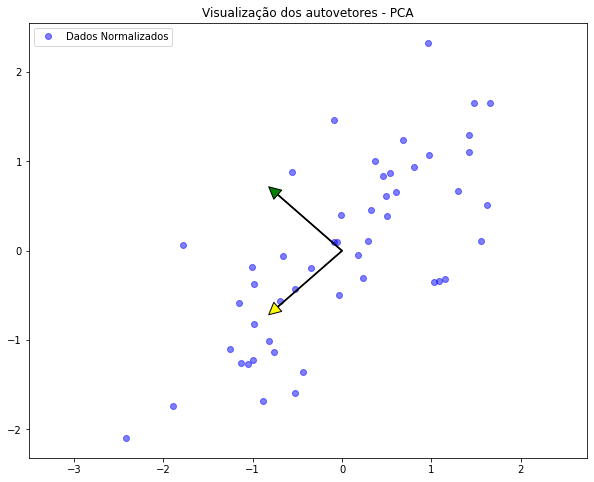

In [12]:
plt.figure(figsize=(10,8))

plt.axis('equal')
plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)

K = 2
for axis, color in zip(U[:K], ['yellow','green']):
  start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]
  plt.annotate('', xy=end,xytext=start,
               arrowprops=dict(facecolor=color, width=0.8))
plt.title('Visualização dos autovetores - PCA')
plt.legend(['Dados Normalizados'], loc=2)

plt.axis('equal')

###2.3.1 Projetando os dados nos componentes principais

Uso do PCA para projetar os dados para o novo espaço dimensional através da função `project_data`. Cada linha equivale à projeção de um exemplo bidimensional para o espaço unidimensional, definido neste exemplo pelo parâmetro $K=1$.

In [13]:
def project_data(X, U, K):
	U_reduce = U[:, 0:K]
	Z = np.zeros((len(X), K))
	for i in range(len(X)):
		x = X[i,:]
		projection_k = np.dot(x, U_reduce)
		Z[i] = projection_k
	return Z


#Realizando a projeção
K = 1
Z = project_data(X_norm, U, K)

#Exibindo as primeiras observações dos dados projetados
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

###2.3.2 Reconstruindo uma aproximação dos dados

Realização do processo inverso para recuperar os dados do espaço unidimensional para o espaço dimensional original. Este tipo de processo ocorre com algum nível de perda, por isso, os valores projetados de volta para a dimensão original não serão necessariamente iguais aos valores que lhes deram origem.

In [14]:
def recover_data(Z, U, K):
	X_rec = np.zeros((len(Z), len(U)))
	for i in range(len(Z)):
		v = Z[i,:]
		for j in range(np.size(U,1)):
			recovered_j = np.dot(v.T,U[j,0:K])
			X_rec[i][j] = recovered_j
	return X_rec


X_rec = recover_data(Z, U, K)
#Exibindo as primeiras observações dos dados recuperados
X_rec[:10]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802]])

###2.3.3 Visualizando as projeções

Na visualização abaixo são exibidos em conjunto os dados originais normalizados e sua versão projetada do espaço bidimensional para o espaço unidimensional. O objetivo do PCA é com estes dados projetados para um novo espaço, utilizá-los em algoritmos de aprendizado de máquina nos quais a dimensão original não seja adequada.

(-2.6226830356073587,
 1.8594098449299337,
 -2.487155577529654,
 2.5591985968858504)

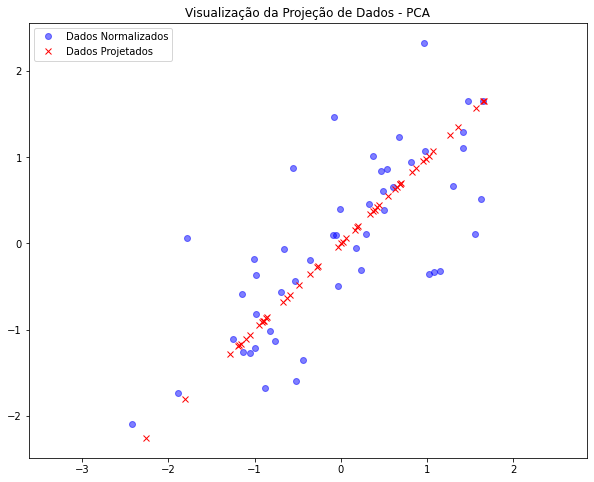

In [15]:
plt.figure(figsize=(10,8))

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)
plt.plot(X_rec[:,0], X_rec[:,1], 'rx')

plt.title('Visualização da Projeção de Dados - PCA')
plt.legend(['Dados Normalizados', 'Dados Projetados'], loc=2)

plt.axis('equal')

#3 Versão simplificada PCA no Scikit-Learn

As células a seguir realizam de forma simplificada a criação e aplicação dos transformadores para normalizar e em seguida projetar os dados.

In [31]:
#Classe usada para criação o transformador
from sklearn.decomposition import PCA
#Criação do transformador
pca = PCA(n_components=1)

In [32]:
#Normalização dos dados
from sklearn.preprocessing import StandardScaler
normalizar = StandardScaler()

In [33]:
#Aplicação da normalização
X_norm_ = normalizar.fit_transform(X)

In [34]:
#Aplicação do PCA
Z_ = pca.fit_transform(X_norm)

Como pode ser visto na conferência abaixo os resultados obtidos foram os mesmos da implementação do zero do algoritmo PCA constante na seção 2.3.1.

In [35]:
#Conferência dos dados
Z_[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

Por fim, com a biblioteca `Scikit-Learn` este processo poderia ser ainda mais simplificado com a criação de um `Pipeline` para realizar as etapas em sequência, conforme demonstramos a seguir.

**OBSERVAÇÃO:** Para executar esta versão sem a realização dos passos anteriores dessa seção, precisaríamos apenas adicionar a importação das classes `StandardScaler` e `PCA` antes de criar o pipeline.

In [36]:
#Criação do Pipelie
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('norm', StandardScaler()),
                     ('pca', PCA(n_components=1))
])

#Execução do Pipeline
Z_pip = pipeline.fit_transform(X_norm)

#Conferência do resultado
Z_pip[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

Também é possível usar a recuperação dos dados com o PCA usando o método `.inverse_transform`, conforme demonstrado abaixo.

In [37]:
X_inv = pca.inverse_transform(Z_pip)
X_inv[:10]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802]])

Como demonstração final, visualizamos o mesmo gráfico usado na conclusão da implementação do zero para efeito de comparação.

(-2.6226830356073587,
 1.859409844929935,
 -2.487155577529654,
 2.5591985968858504)

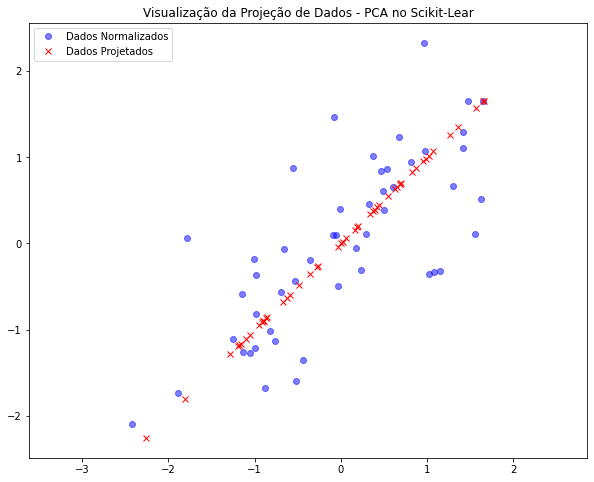

In [38]:
plt.figure(figsize=(10,8))

plt.plot(X_norm_[:,0], X_norm_[:,1], 'bo', alpha=0.5)
plt.plot(X_inv[:,0], X_rec[:,1], 'rx')

plt.title('Visualização da Projeção de Dados - PCA no Scikit-Lear')
plt.legend(['Dados Normalizados', 'Dados Projetados'], loc=2)

plt.axis('equal')

#Referências e Links

**Referências**

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

---


Conteúdos adicionais e explicações detalhadas do algoritmo em:
Redução de Dimensionalidade: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml_ppcic_dim_reduc.ipynb

Análise de Componentes Principais - PCA: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais